In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)


2.10.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

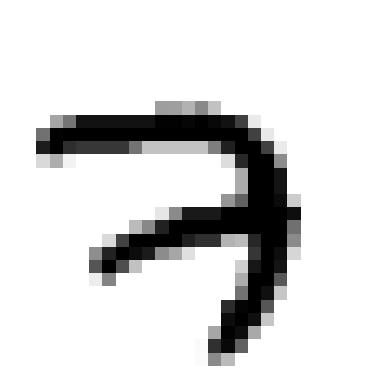

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

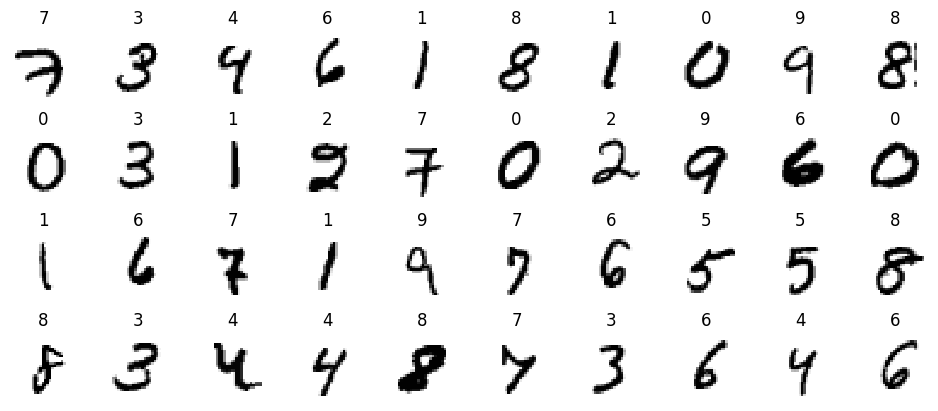

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
import keras.utils as np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [9]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.6028 - accuracy: 0.8421 - val_loss: 0.2999 - val_accuracy: 0.9190
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9184 - val_loss: 0.2365 - val_accuracy: 0.9336
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2308 - accuracy: 0.9337 - val_loss: 0.1946 - val_accuracy: 0.9434
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1969 - accuracy: 0.9434 - val_loss: 0.1731 - val_accuracy: 0.9526
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1729 - accuracy: 0.9505 - val_loss: 0.1560 - val_accuracy: 0.9578
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1541 - accuracy: 0.9563 - val_loss: 0.1423 - val_accuracy: 0.9596
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1387 - accuracy: 0.9612 - val_loss: 0.1310 - val_accuracy:

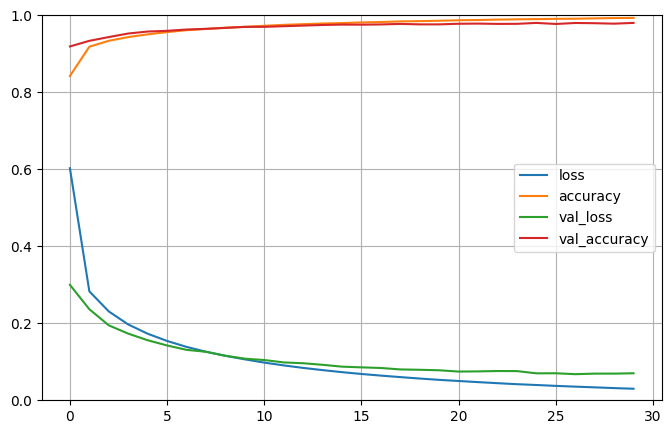

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.9774


[0.07029830664396286, 0.977400004863739]

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 109ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

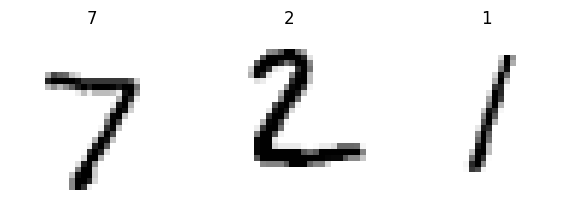

In [15]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.
Do modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia


Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6035 - accuracy: 0.8106 - val_loss: 0.2222 - val_accuracy: 0.9354
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3523 - accuracy: 0.8901 - val_loss: 0.1774 - val_accuracy: 0.9466
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2949 - accuracy: 0.9093 - val_loss: 0.1529 - val_accuracy: 0.9558
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2608 - accuracy: 0.9193 - val_loss: 0.1397 - val_accuracy: 0.9580
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2359 - accuracy: 0.9271 - val_loss: 0.1261 - val_accuracy: 0.9626
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2185 - accuracy: 0.9327 - val_loss: 0.1181 - val_accuracy: 0.9664
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2036 - accuracy: 0.9369 - val_loss: 0.1112 - val_accuracy:

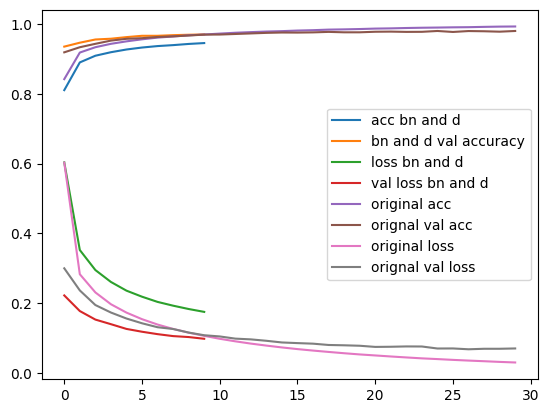

In [20]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
])

model2.compile(loss="categorical_crossentropy",optimizer='sgd',metrics=["accuracy"])
history2 = model2.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['acc bn and d','bn and d val accuracy', 'loss bn and d','val loss bn and d', 'original acc', 'orignal val acc','original loss', 'orignal val loss'])